In [3]:
# -----------------------------------------------------------------------------
# Gated working memory with an echo state network
# Copyright (c) 2018 Nicolas P. Rougier
#
# Distributed under the terms of the BSD License.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from data import generate_data, smoothen, str_to_bmp, convert_data 
from model_modified import generate_model, train_model, test_model
from identify_neurons import identify_neurons
from lesion import lesion
import sys
import os

if __name__ == '__main__':
    # Display
    fig = plt.figure(figsize=(10,8))
    fig.patch.set_alpha(0.0)
    n_subplots = 1

    # 1-3-3 scalar task
    # Random generator initialization
    task = "1-3-3-scalar"
    n_gate = 3
    print(task)

    np.random.seed(1)

    save_err = {}
    save_w_out = {}

    initial_model = generate_model(shape=(1+n_gate,1000,n_gate), sparsity=0.5,
                                radius=0.1, scaling=(1.0, 0.33), leak=1.0,
                                noise=(0.000, 0.0000, 0.000), seed = 90)

    # Build memory
    for i in range(100,1001,100 ):

        
        model = lesion(initial_model, np.arange(i))

        # Training data
        n = 25000
        values = np.random.uniform(-1, +1, n)
        ticks = np.random.uniform(0, 1, (n, n_gate)) < 0.01
        train_data = generate_data(values, ticks)

        # Testing data
        n = 2500
        values = smoothen(np.random.uniform(-1, +1, n))
        ticks = np.random.uniform(0, 1, (n, n_gate)) < 0.01
        test_data = generate_data(values, ticks, last = train_data["output"][-1])

        error = train_model(model, train_data, seed = 90)
        print("Training error : {0}".format(error))

        # # identify the neurons to be lesioned
        # num_lesion_neurons = 1
        # neurons_lesion_dict = identify_neurons(model['W_out'], num_lesion_neurons)   # a dictionary of lesioned neurons, choices made on output/method
        # neurons_lesion = neurons_lesion_dict['random, output 2']

        # lesion correspoing weights of selected neurons
        # lesioned_model = lesion(model, neurons_lesion)

        error_wo_lesion = test_model(model, test_data, 90)
        save_err[ f'{i} neurons'] = error_wo_lesion
        save_w_out[f'{i} neurons'] = model['W_out']





        #error_w_lesion = test_model(lesioned_model, test_data, 42)
        print("Testing error without lesion : {0}".format(error_wo_lesion))
        #print("Testing error with lesion : {0}".format(error_w_lesion))
        # np.save(files[0], test_data)
        # np.save(files[1], model["output"])
        # np.save(files[2], model["state"])

        # Display
        # colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
        # data = test_data

        # ax2 = plt.subplot(n_subplots, 1, 1)
        # ax2.tick_params(axis='both', which='major', labelsize=8)
        # ax2.plot(data["input"][:,0],  color='0.75', lw=1.0)

        # X, Y = np.arange(len(data)), np.ones(len(data))
        # for i in range(n_gate):
        #     C = np.zeros((len(data),4))
        #     r = eval("0x"+colors[i][1:3])
        #     g = eval("0x"+colors[i][3:5])
        #     b = eval("0x"+colors[i][5:7])
        #     C[:,0] = r/255
        #     C[:,1] = g/255
        #     C[:,2] = b/255
        #     C[:,3] = data["input"][:,1+i]
        #     ax2.scatter(X, -1.05*Y-0.04*i, s=1.5, facecolors=C, edgecolors=None)
        #     ax2.plot(data["output"][:,i],  color='0.75', lw=1.0)
        #     ax2.plot(model["output"][:,i], lw=1.5, zorder=10)
        #     #ax2.plot(lesioned_model["output"][:,i], lw=1.5, zorder=10)

        # ax2.text(-25, -1.05, "Ticks:",
        #         fontsize=8, transform=ax2.transData,
        #         horizontalalignment="right", verticalalignment="center")
        # ax2.set_ylim(-1.25,1.25)
        # ax2.yaxis.tick_right()
        # ax2.set_ylabel("Input & Output")
        # ax2.text(0.01, 0.9, "B",
        #         fontsize=16, fontweight="bold", transform=ax2.transAxes,
        #         horizontalalignment="left", verticalalignment="top")
        # plt.show()

1-3-3-scalar


100%|██████████| 24999/24999 [00:06<00:00, 3671.88it/s]


Training error : 0.0012020206801411587


100%|██████████| 2500/2500 [00:00<00:00, 3561.55it/s]


Testing error without lesion : {'error0': 0.022148991802790764, 'error1': 0.01745059583811277, 'error2': 0.01975632179535594, 'error_whole': 0.019878073212016865}


100%|██████████| 24999/24999 [00:05<00:00, 4534.74it/s]


Training error : 0.005122737107145005


100%|██████████| 2500/2500 [00:00<00:00, 3737.33it/s]


Testing error without lesion : {'error0': 0.026246327844662166, 'error1': 0.0664985141808906, 'error2': 0.06240539181989366, 'error_whole': 0.05478854820060498}


100%|██████████| 24999/24999 [00:06<00:00, 4088.38it/s]


Training error : 0.002888456025696524


100%|██████████| 2500/2500 [00:00<00:00, 3533.11it/s]


Testing error without lesion : {'error0': 0.023034752618240357, 'error1': 0.03205114544615192, 'error2': 0.020595857282227233, 'error_whole': 0.02570385891770461}


100%|██████████| 24999/24999 [00:05<00:00, 4234.53it/s]


Training error : 0.003638308505721182


100%|██████████| 2500/2500 [00:00<00:00, 2639.05it/s]


Testing error without lesion : {'error0': 0.042807955591437415, 'error1': 0.03473048088564564, 'error2': 0.031238585972589977, 'error_whole': 0.036581309517446065}


100%|██████████| 24999/24999 [00:04<00:00, 5086.97it/s]


Training error : 0.0027341700572083055


100%|██████████| 2500/2500 [00:00<00:00, 3480.55it/s]


Testing error without lesion : {'error0': 0.02416471175148489, 'error1': 0.03438382052673993, 'error2': 0.021583785916674814, 'error_whole': 0.027276609164534265}


100%|██████████| 24999/24999 [00:05<00:00, 4482.15it/s]


Training error : 0.001577547307996997


100%|██████████| 2500/2500 [00:00<00:00, 3514.41it/s]


Testing error without lesion : {'error0': 0.08176660105350944, 'error1': 0.2100712742380942, 'error2': 0.09919422011204454, 'error_whole': 0.14219143271366846}


100%|██████████| 24999/24999 [00:05<00:00, 4548.29it/s]


Training error : 0.0032364112978547173


100%|██████████| 2500/2500 [00:00<00:00, 3856.81it/s]


Testing error without lesion : {'error0': 0.07627797079901188, 'error1': 0.05219491582238513, 'error2': 0.05961045011800719, 'error_whole': 0.06349814650888691}


100%|██████████| 24999/24999 [00:05<00:00, 4327.20it/s]


Training error : 0.004481458047577518


100%|██████████| 2500/2500 [00:00<00:00, 3026.48it/s]


Testing error without lesion : {'error0': 0.06965788648718735, 'error1': 0.04113486783387211, 'error2': 0.047955836550208, 'error_whole': 0.054295674354415714}


100%|██████████| 24999/24999 [00:05<00:00, 4282.50it/s]


Training error : 0.010845014471778087


100%|██████████| 2500/2500 [00:00<00:00, 3495.83it/s]


Testing error without lesion : {'error0': 0.1165176387540045, 'error1': 0.2966544018771865, 'error2': 0.29161774196199897, 'error_whole': 0.24941337956689158}


100%|██████████| 24999/24999 [00:05<00:00, 4604.65it/s]


Training error : 0.5775484482313701


100%|██████████| 2500/2500 [00:00<00:00, 4417.51it/s]

Testing error without lesion : {'error0': 0.2249283512418881, 'error1': 0.3832803638554778, 'error2': 0.3247820435447408, 'error_whole': 0.3177944704357831}


<Figure size 1000x800 with 0 Axes>

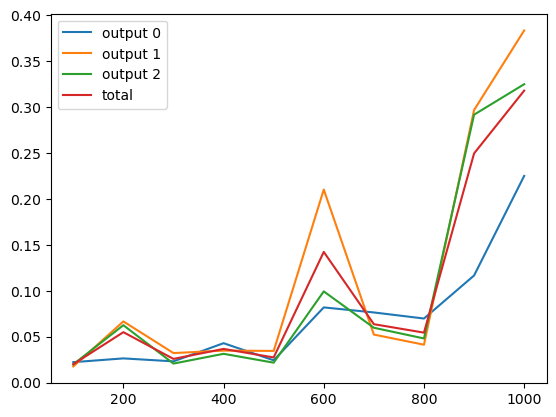

In [4]:
save_err

list(list(save_err.values())[0].values())

y = []

for i in range(10):
    y.append(list(list(save_err.values())[i].values()))

y
x=np.arange(100, 1001, 100)
# ax.plot([1, 2, 3], label=)
# ax.legend()
plt.plot(x,y, label=['output 0','output 1','output 2','total'])
plt.legend()
plt.show()


In [25]:
list(list(save_err.values())[7].values())

save_err["800 neurons"]


{'error0': 0.21515692407411496,
 'error1': 0.049173319971433725,
 'error2': 0.24974494761265692,
 'error_whole': 0.1924257919580916}

In [1]:
import numpy as np
a= np.arange(1000)

In [3]:
a[-1000:]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18